In [1]:
import cv2
import numpy as np
import os
import shutil
import glob
import yaml
import random
import matplotlib.pyplot as plt
import google.colab
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def load_dataset(data_folder):
    images = []
    labels = []

    for filename in os.listdir(data_folder):
        if filename.endswith((".jpg", ".png")):
            image_path = os.path.join(data_folder, filename)
            label_path = os.path.splitext(image_path)[0] + ".txt"
            if os.path.exists(label_path):
                images.append(image_path)
                labels.append(label_path)

    return images, labels

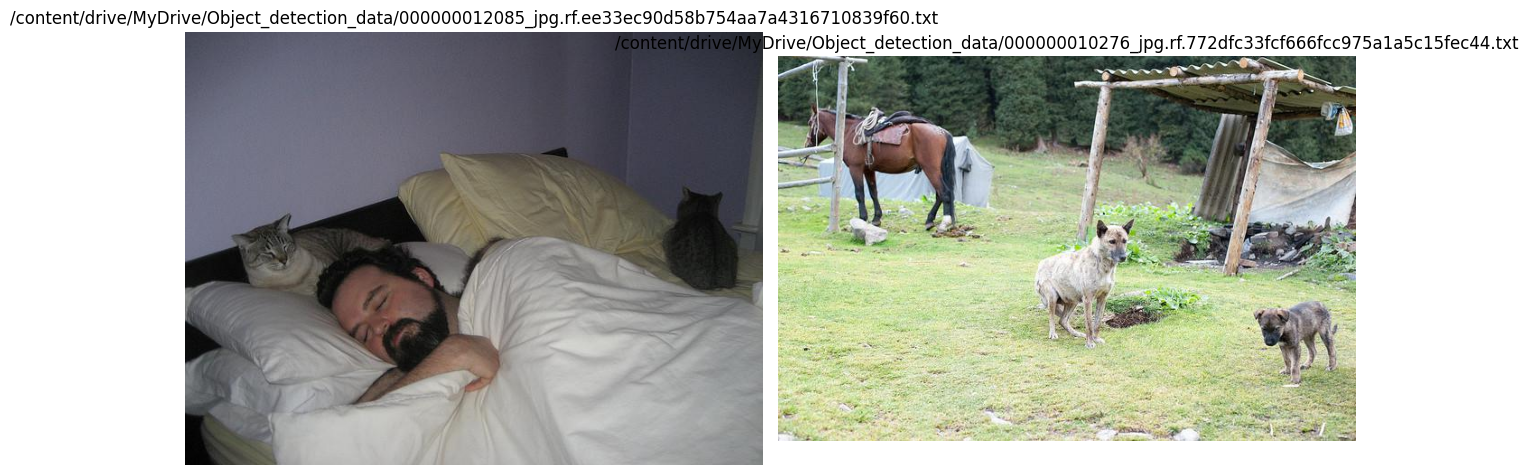

In [4]:
def display_sample_images(images, labels, num_samples=5):
    num_images = len(images)
    plt.figure(figsize=(12, 5))

    sample_indices = random.sample(range(num_images), min(num_samples, num_images))

    for sample_idx, idx in enumerate(sample_indices, 1):
        image = plt.imread(images[idx])

        plt.subplot(1, num_samples, sample_idx)
        plt.imshow(image)
        plt.title(labels[idx])  # Assuming labels contain class names
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Load dataset
data_folder = "/content/drive/MyDrive/Object_detection_data"
images, labels = load_dataset(data_folder)

# Display sample images
display_sample_images(images, labels, num_samples=2)

In [5]:
!git clone https://github.com/ultralytics/ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 24926, done.
remote: Counting objects: 100% (373/373), done.
remote: Compressing objects: 100% (252/252), done.
remote: Total 24926 (delta 208), reused 237 (delta 120), pack-reused 24553
Receiving objects: 100% (24926/24926), 14.76 MiB | 20.99 MiB/s, done.
Resolving deltas: 100% (17540/17540), done.


In [6]:
%pip install -qe ultralytics

  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ultralytics (pyproject.toml) ... done


In [7]:
import os
import shutil
import yaml

def load_classes(names_file):
    with open(names_file, "r") as f:
        class_names = f.read().strip().split("\n")
    return class_names

In [8]:
# Move images and labels to Ultralytics directory
ultralytics_dir = "content/train"
os.makedirs(ultralytics_dir, exist_ok=True)
images_dir = os.path.join(ultralytics_dir, "images")
labels_dir = os.path.join(ultralytics_dir, "labels")

os.makedirs(images_dir, exist_ok=True)
os.makedirs(labels_dir, exist_ok=True)

In [9]:
for image_path, label_path in zip(images, labels):
    image_filename = os.path.basename(image_path)
    label_filename = os.path.basename(label_path)
    shutil.copy(image_path, os.path.join(images_dir, image_filename))
    shutil.copy(label_path, os.path.join(labels_dir, label_filename))

In [10]:
# Load class names from names.names
class_names = load_classes("/content/drive/MyDrive/_darknet.labels")

# Create dataset YAML file
data = {
    "path": ultralytics_dir,
    "train": "images",
    "val": "images",
    "nc": len(class_names),  # Number of classes
    "names": class_names
}

with open(os.path.join(ultralytics_dir, "dataset.yaml"), 'w') as outfile:
    yaml.dump(data, outfile, default_flow_style=False)

In [11]:
%cd content

/content/content


In [12]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 16575, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 16575 (delta 28), reused 37 (delta 18), pack-reused 16522
Receiving objects: 100% (16575/16575), 15.10 MiB | 22.84 MiB/s, done.
Resolving deltas: 100% (11385/11385), done.


In [13]:
%cd yolov5

/content/content/yolov5


In [14]:
!pip install -qr requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.3.0 which is incompatible.


In [20]:
!python train.py --img 256 --batch 12 --epochs 30 --data /content/content/yolov5/models/dataset.yaml --weights yolov5s.pt --cache

2024-05-02 08:21:04.502584: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-02 08:21:04.502649: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-02 08:21:04.505136: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/content/yolov5/models/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=12, imgsz=256, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_sca

In [120]:
!python detect.py --source /content/content/train/images --weights /content/content/yolov5/runs/train/exp5/weights/best.pt --img 640

detect: weights=['/content/content/yolov5/runs/train/exp5/weights/best.pt'], source=/content/content/train/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-306-gb599ae42 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/691 /content/content/train/images/000000009465_jpg.rf.3d5a6b94f8c1afdc004f2641cd578912.jpg: 448x640 1 zebra, 327.6ms
image 2/691 /content/content/train/images/000000009466_jpg.rf.5b49bdd7c037ed299dd3b6fd2531c34d.jpg: 448x640 1 mouse, 310.0ms
image 3/691 /content/content/train/images/000000009469_jpg.rf.38d5d2

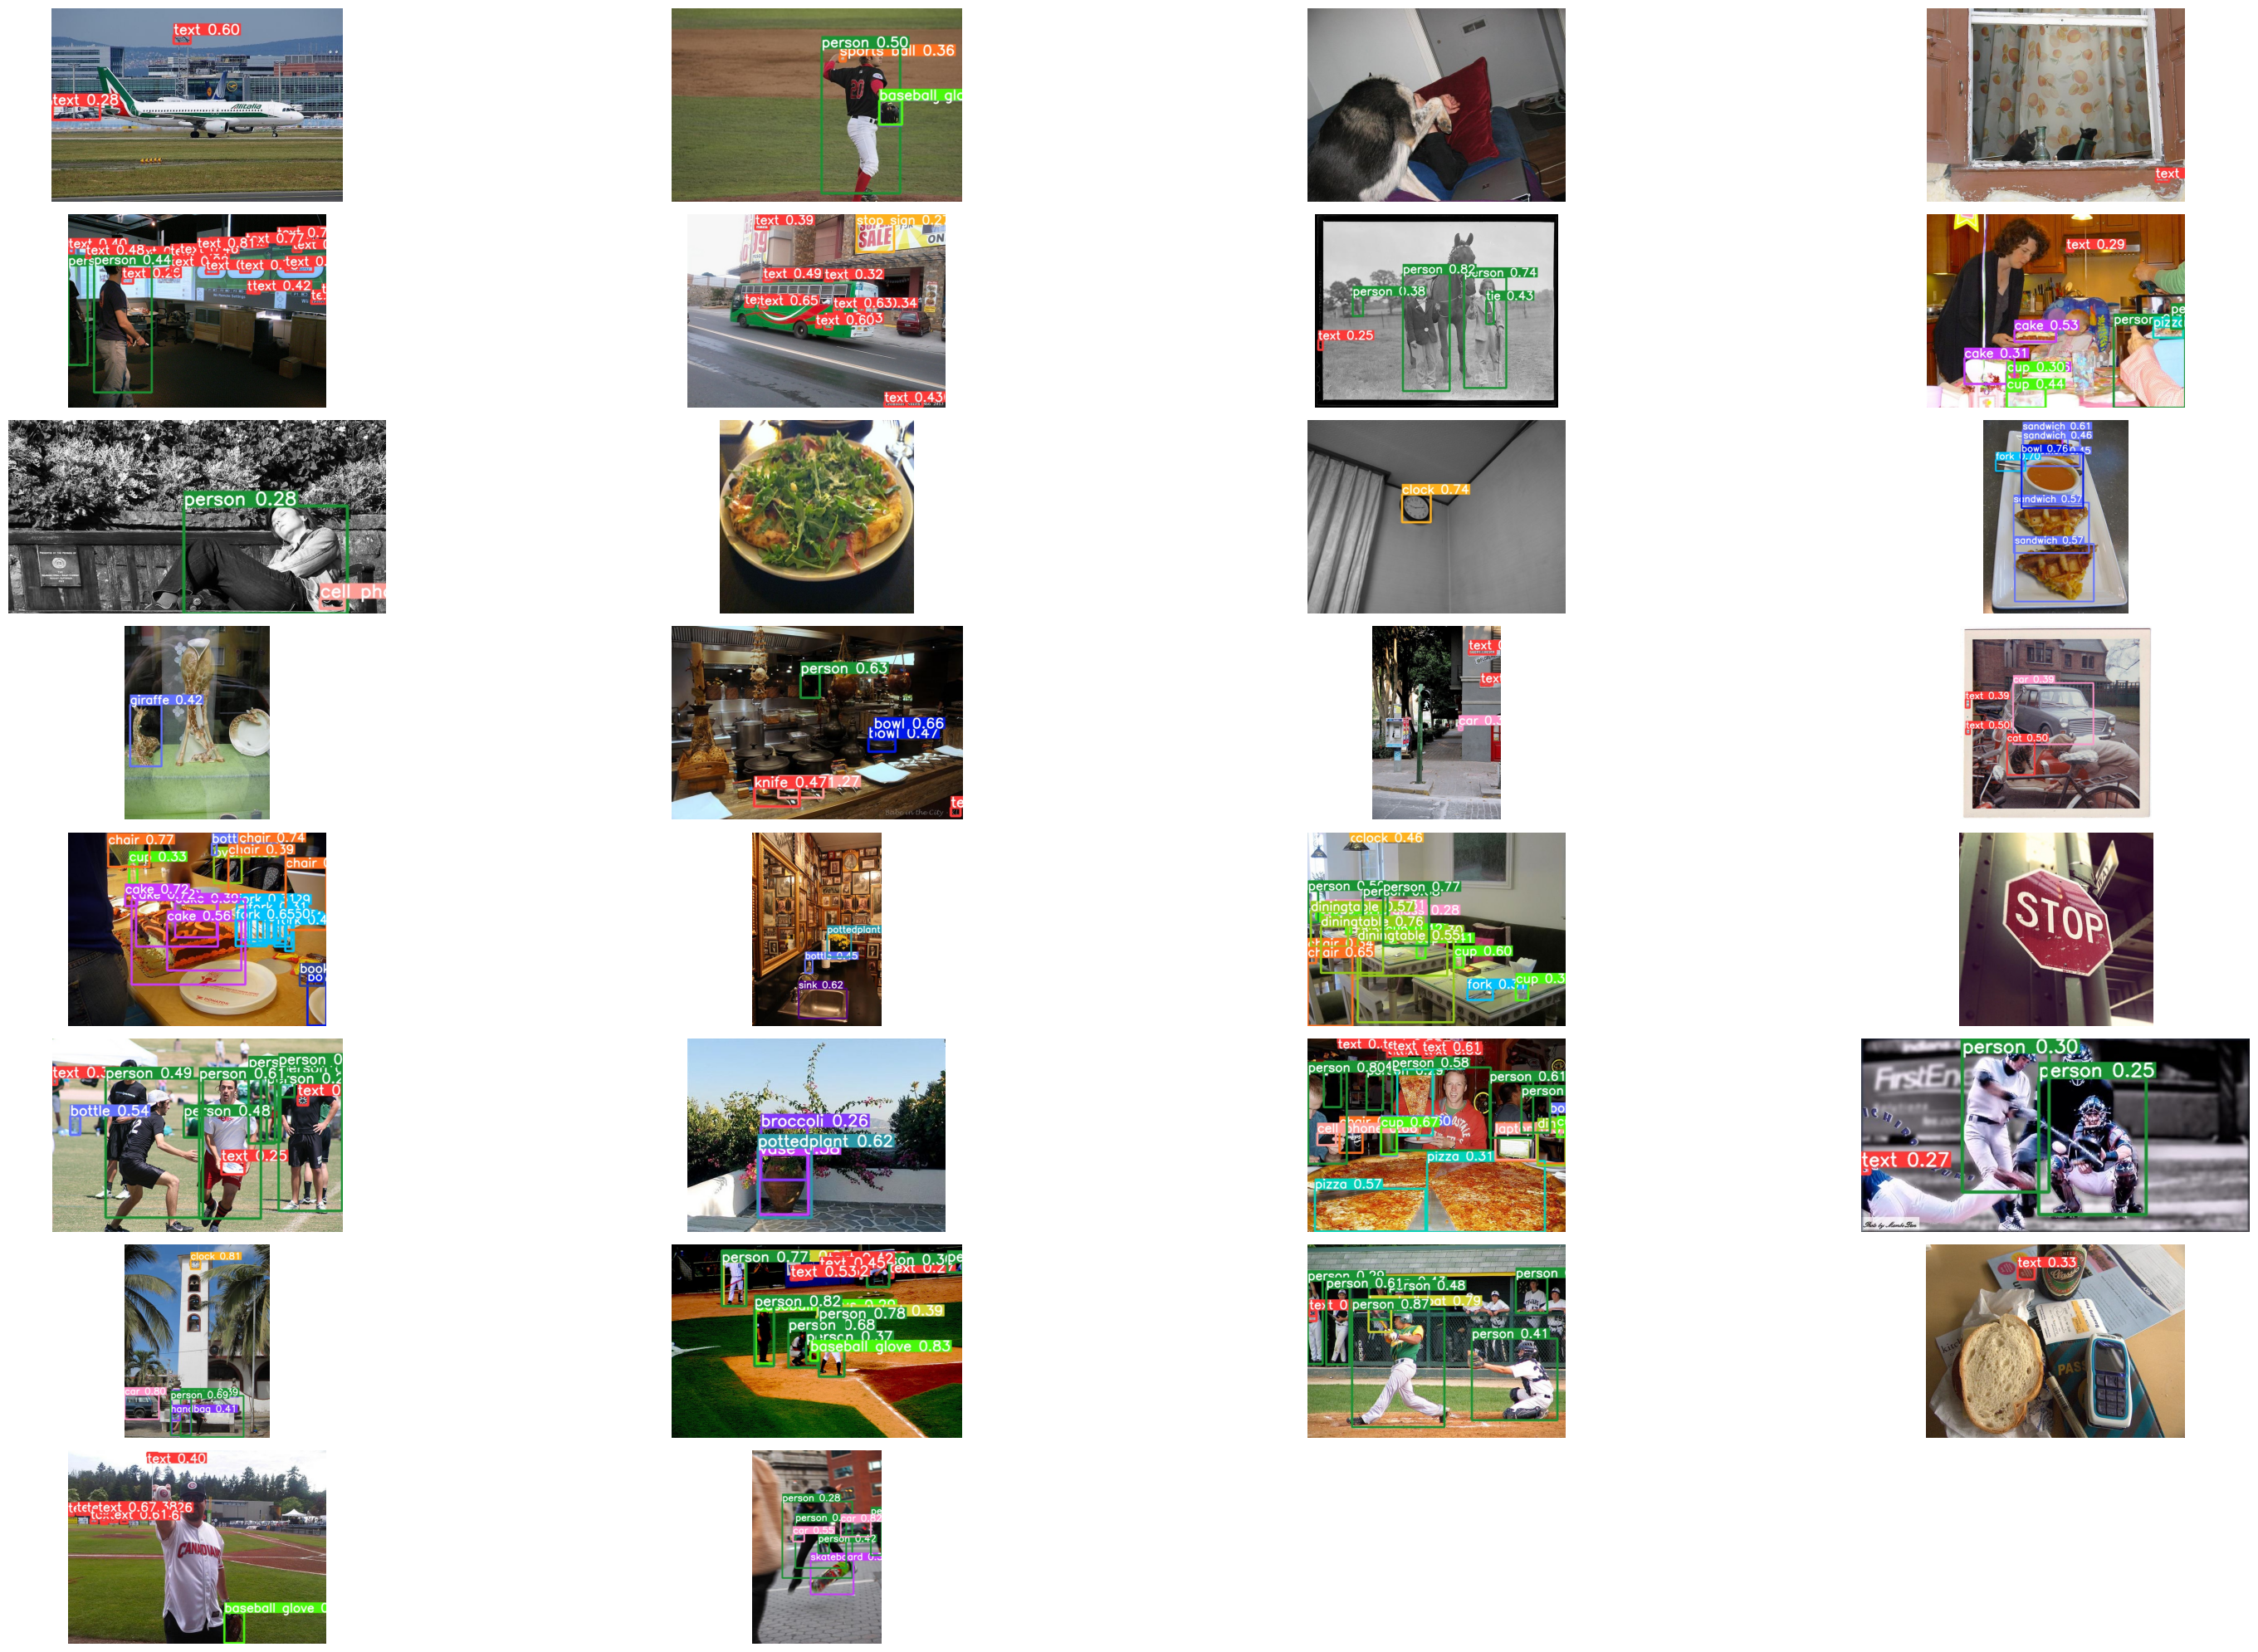

In [121]:
import os
import matplotlib.pyplot as plt

def display_images_from_folder(folder_path):
    # Get list of image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith((".jpg", ".png", ".jpeg"))]

    # Display up to 25 images
    num_images = min(len(image_files), 30)
    num_cols = 4
    num_rows = (num_images + num_cols - 1) // num_cols
    plt.figure(figsize=(30, 20))

    for i, image_file in enumerate(image_files[:30], 1):
        image_path = os.path.join(folder_path, image_file)
        image = plt.imread(image_path)

        plt.subplot(num_rows, num_cols, i)
        plt.imshow(image)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Example usage: Display images from a folder
folder_path = "/content/content/yolov5/runs/detect/exp12"
display_images_from_folder(folder_path)


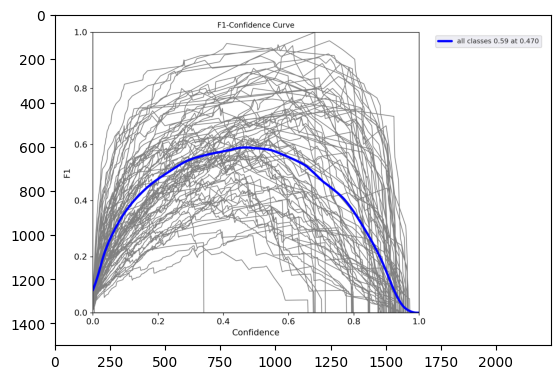

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('/content/content/yolov5/runs/train/exp5/F1_curve.png'))

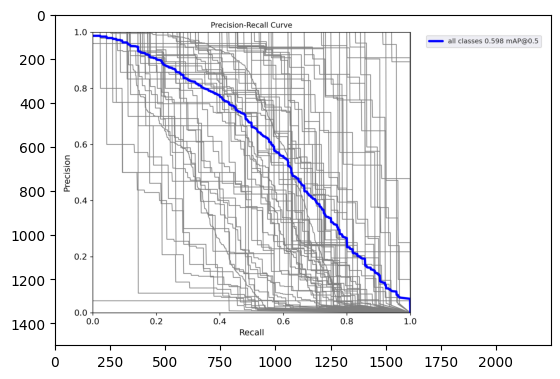

In [29]:
plt.imshow(mpimg.imread('/content/content/yolov5/runs/train/exp5/PR_curve.png'))

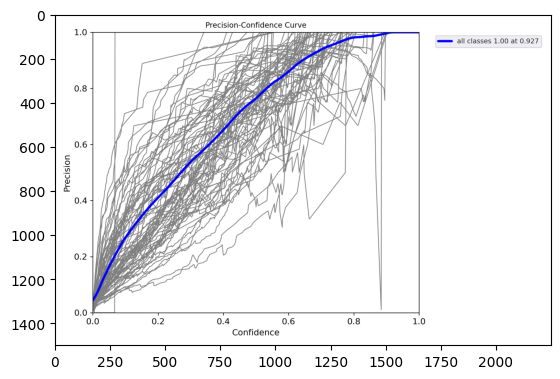

In [30]:
plt.imshow(mpimg.imread('/content/content/yolov5/runs/train/exp5/P_curve.png'))

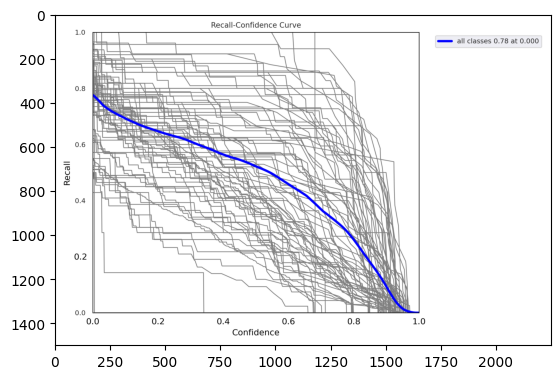

In [31]:
plt.imshow(mpimg.imread('/content/content/yolov5/runs/train/exp5/R_curve.png'))

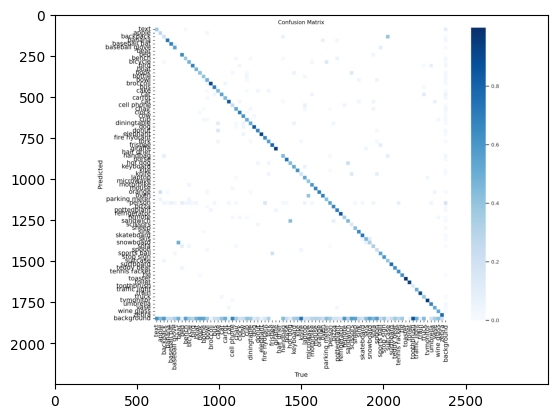

In [32]:
plt.imshow(mpimg.imread('/content/content/yolov5/runs/train/exp5/confusion_matrix.png'))

# **Doctr OCR**

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
!pip install tf2onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 29.8 MB/s eta 0:00:00


In [37]:
!pip install python-doctr[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.

In [38]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
model = ocr_predictor(det_arch = 'db_resnet50', reco_arch = 'crnn_vgg16_bn', pretrained = True)

  0%|          | 0/94122142 [00:00<?, ?it/s]

  0%|          | 0/58758994 [00:00<?, ?it/s]

In [113]:
img_path = "/content/content/yolov5/runs/detect/exp11/pablo2.jpeg" #Specify your image path here
img = DocumentFile.from_images(img_path)
result = model(img)
output = result.export()

In [114]:
import json
with open("docTR_OCR_output.json", "w") as f:
    f.write(json.dumps(output, indent=1))

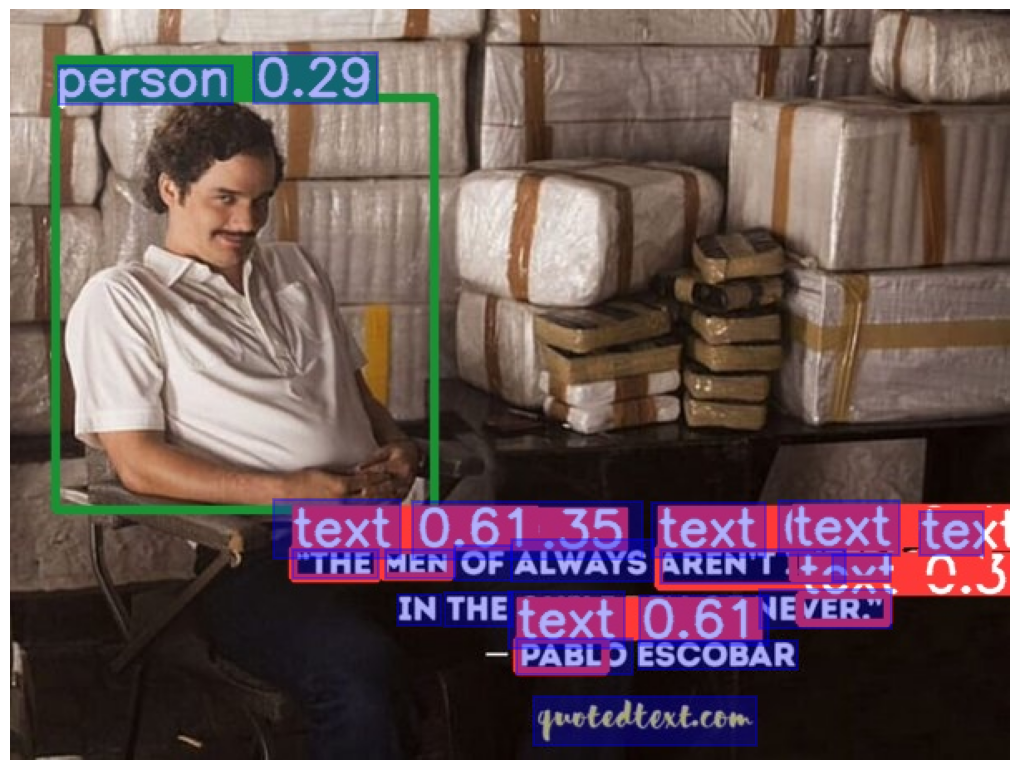

In [115]:
result.show()

In [116]:
import re

# Define the function to print whatever was read from the document
import re

def print_ocr_text(ocr_output):
    full_text = " ".join([obj3["value"] for obj1 in ocr_output['pages'][0]["blocks"] for obj2 in obj1["lines"] for obj3 in obj2["words"]])
    print("Text read from the document:")
    print(full_text)

    # Remove punctuation and numbers
    clean_text = re.sub(r'\b\w{1,2}\b', '', full_text)  # Remove words with less than 3 characters
    clean_text = re.sub(r'[^\w\s]', '', clean_text)     # Remove punctuation
    clean_text = re.sub(r'\d', '', clean_text)         # Remove numbers
    print("Cleaned text:")
    print(clean_text)

# Example usage:
print_ocr_text(output)


# Example usage:
print_ocr_text(output)

Text read from the document:
person 0.29 text 0.61.35 text (text tex "THE MEN OF ALWAYS AREN'T+A aut IN THE text 0.61 NEVER" PABLD ESCOBAR quetedtext.com
Cleaned text:
person  text  text text tex THE MEN  ALWAYS AREN aut  THE text  NEVER PABLD ESCOBAR quetedtextcom
Text read from the document:
person 0.29 text 0.61.35 text (text tex "THE MEN OF ALWAYS AREN'T+A aut IN THE text 0.61 NEVER" PABLD ESCOBAR quetedtext.com
Cleaned text:
person  text  text text tex THE MEN  ALWAYS AREN aut  THE text  NEVER PABLD ESCOBAR quetedtextcom


# **Text-To-Speech**

In [43]:
pip install gtts

In [47]:
pip install hyphenate

In [48]:
from pydub import AudioSegment
from pydub.playback import play
import hyphenate
from gtts import gTTS

In [49]:
!pip install playsound


  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7020 sha256=8367ee4aa69dfbef6fea369d0d7b9c67415895223225ef13d2f3f10615eca747
  Stored in directory: /root/.cache/pip/wheels/90/89/ed/2d643f4226fc8c7c9156fc28abd8051e2d2c0de37ae51ac45c
Successfully built playsound


In [117]:
from gtts import gTTS
import os

# Define the function to print whatever was read from the document
import re

def print_ocr_text(ocr_output, output_dir):
    full_text = " ".join([obj3["value"] for obj1 in ocr_output['pages'][0]["blocks"] for obj2 in obj1["lines"] for obj3 in obj2["words"]])
    print("Text read from the document:")
    print(full_text)
   # Remove punctuation and numbers
    clean_text = re.sub(r'\b\w{1,2}\b', '', full_text)  # Remove words with less than 3 characters
    clean_text = re.sub(r'[^\w\s]', '', clean_text)     # Remove punctuation
    clean_text = re.sub(r'\d', '', clean_text)         # Remove numbers
    print("Cleaned text:")
    print(clean_text)

    # Speak the text
    speak_text("This image shows" + clean_text, output_dir)

# Function to make the model speak the text
def speak_text(text, output_dir):
    output_path = os.path.join(output_dir, "output10.mp3")  # Set the output file path
    tts = gTTS(text=text, lang='en')
    tts.save(output_path)

# Example usage:
output_dir = "/content/"  # Define the output directory
print_ocr_text(output, output_dir)


Text read from the document:
person 0.29 text 0.61.35 text (text tex "THE MEN OF ALWAYS AREN'T+A aut IN THE text 0.61 NEVER" PABLD ESCOBAR quetedtext.com
Cleaned text:
person  text  text text tex THE MEN  ALWAYS AREN aut  THE text  NEVER PABLD ESCOBAR quetedtextcom
